<a href="https://colab.research.google.com/github/kozen88/HCV_DM23/blob/main/Semi-Ottimizzazione_del_percettrone_e_del_MLP_su_dataset_normalizzato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Addestramento percetrone

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb
sb.set()

In [8]:
df = pd.read_csv('HCV_ImputerMean.csv', delimiter=',')
print(df)

      Age   Gender   BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0     56.0     1.0  35.0    2.0             1.0        1.0        1.0   
1     46.0     1.0  29.0    1.0             2.0        2.0        1.0   
2     57.0     1.0  33.0    2.0             2.0        2.0        2.0   
3     49.0     2.0  33.0    1.0             2.0        1.0        2.0   
4     59.0     1.0  32.0    1.0             1.0        2.0        1.0   
...    ...     ...   ...    ...             ...        ...        ...   
1380  44.0     1.0  29.0    1.0             2.0        2.0        2.0   
1381  55.0     1.0  34.0    1.0             2.0        2.0        1.0   
1382  42.0     1.0  26.0    2.0             2.0        1.0        1.0   
1383  52.0     1.0  29.0    2.0             1.0        1.0        2.0   
1384  55.0     2.0  26.0    1.0             2.0        2.0        2.0   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
0                                  2.0        2

## Normalizzazione di tutto il dataset
Andiamo a creare un MinMaxScaler che andrà a normalizzare tutte le colonne e i valori presenti nel range [0,1] e in seguito useremo il dataset cosi processato per addestrare prima il percettrone e in seguito il Multi-Layer Perceptron.

In [9]:
# effettuiamo la divisione tra feature di input e feature target
X = df.drop('Baselinehistological staging', axis=1)
y = df['Baselinehistological staging']

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Seleziona solo le colonne numeriche che desideri normalizzare
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Crea un oggetto MinMaxScaler
scaler = MinMaxScaler()

# Applica la normalizzazione a ogni colonna numerica
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Salva il DataFrame normalizzato in un nuovo file CSV
# df.to_csv('df_normalizzato.csv', index=False)

In [11]:
print(X)

          Age   Gender       BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0     0.827586     0.0  1.000000    1.0             0.0        0.0        0.0   
1     0.482759     0.0  0.538462    0.0             1.0        1.0        0.0   
2     0.862069     0.0  0.846154    1.0             1.0        1.0        1.0   
3     0.586207     1.0  0.846154    0.0             1.0        0.0        1.0   
4     0.931034     0.0  0.769231    0.0             0.0        1.0        0.0   
...        ...     ...       ...    ...             ...        ...        ...   
1380  0.413793     0.0  0.538462    0.0             1.0        1.0        1.0   
1381  0.793103     0.0  0.923077    0.0             1.0        1.0        0.0   
1382  0.344828     0.0  0.307692    1.0             1.0        0.0        0.0   
1383  0.689655     0.0  0.538462    1.0             0.0        0.0        1.0   
1384  0.793103     1.0  0.307692    0.0             1.0        1.0        1.0   

      Fatigue & generalized

Riproponiamo il modello percettrone addestrato sul dataset normalizzato con un processo di cross validaation a 10 folds.

In [12]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Istanziazione di un modello Perceptron
perceptron = Perceptron(max_iter=100, eta0=0.1, random_state=42)

# usiamo la cross-val
scores = cross_val_score(perceptron, X, y, cv=10)
mean_accurancy = scores.mean()
print("Accurancy su ogni ciclo della cross-validation:", scores)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy)

Accurancy su ogni ciclo della cross-validation: [0.28776978 0.23021583 0.27338129 0.25179856 0.24460432 0.3115942
 0.24637681 0.27536232 0.26811594 0.21014493]
Accurancy mediata su i 10 fold fatti: 0.25993639870712126


Creiamo delle fuynzioni che ci permettano di valutare il modello su differenti valori k di folds e in seguito che siano in grado di plottare dei grafici per visualizzare l'andamento dell'accurancy rispetto al numero di fold utilizzati.

In [13]:
# creiamo questa funzione di addestramento per automatizzare i nostri esperimenti
def evaluate_classifiers(cv_values, classifiers, X, y):
    for classifier in classifiers:
        print("Classifier:", classifier)
        for cv in cv_values:
            model = classifier()
            scores = cross_val_score(model, X, y, cv=cv)
            mean_accuracy = scores.mean()
            print("CV:", cv)
            print("Mean Accuracy:", mean_accuracy)
            print("Scores:", scores)
            print("__________________________________________________________________________")
            print("##########################################################################")
            print(" ")

In [14]:
def evaluate_classifiers_with_plot(cv_values, classifiers, X, y, step):
    for classifier in classifiers:
        print("Classifier:", classifier)
        mean_accuracies_list = []
        for cv in cv_values:
            model = classifier()
            scores = cross_val_score(model, X, y, cv=cv)
            mean_accuracy = scores.mean()
            mean_accuracies_list.append(mean_accuracy)
            print("CV:", cv)
            print("Mean Accuracy:", mean_accuracy)
            print("Scores:", scores)
            print("__________________________________________________________________________")
            print("##########################################################################")
            print(" ")

        # Plotting the mean accuracies
        cv_range = np.array(cv_values)
        plt.plot(cv_range, mean_accuracies_list)
        plt.xticks(np.arange(0, max(cv_range) + 1, step))
        plt.xlabel('Number of folds (cv)')
        plt.ylabel('Mean Accuracy')
        plt.title('Cross-Validation Mean Accuracy')
        plt.show()

In [15]:
# Test sui principali valori k di fold usati nella letterratura scientifica
values = [5, 10, 15, 20]
evaluate_classifiers(values, [Perceptron], X, y)

Classifier: <class 'sklearn.linear_model._perceptron.Perceptron'>
CV: 5
Mean Accuracy: 0.2505415162454874
Scores: [0.26353791 0.2599278  0.23104693 0.2599278  0.23826715]
__________________________________________________________________________
##########################################################################
 
CV: 10
Mean Accuracy: 0.25999895735585443
Scores: [0.25179856 0.20863309 0.25899281 0.23741007 0.24460432 0.23188406
 0.26811594 0.28985507 0.28985507 0.31884058]
__________________________________________________________________________
##########################################################################
 
CV: 15
Mean Accuracy: 0.24615864110955274
Scores: [0.31182796 0.22580645 0.24731183 0.25806452 0.25806452 0.26086957
 0.23913043 0.29347826 0.19565217 0.26086957 0.2826087  0.25
 0.16304348 0.22826087 0.2173913 ]
__________________________________________________________________________
##########################################################################

Classifier: <class 'sklearn.linear_model._perceptron.Perceptron'>
CV: 2
Mean Accuracy: 0.2209272743954825
Scores: [0.23665224 0.20520231]
__________________________________________________________________________
##########################################################################
 
CV: 3
Mean Accuracy: 0.2418842906912321
Scores: [0.23593074 0.23809524 0.2516269 ]
__________________________________________________________________________
##########################################################################
 
CV: 4
Mean Accuracy: 0.2411608169112625
Scores: [0.23342939 0.25144509 0.23699422 0.24277457]
__________________________________________________________________________
##########################################################################
 
CV: 5
Mean Accuracy: 0.2505415162454874
Scores: [0.26353791 0.2599278  0.23104693 0.2599278  0.23826715]
__________________________________________________________________________
#################################################

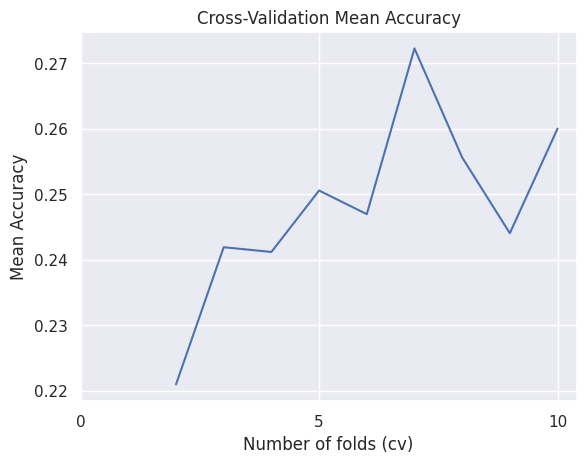

In [16]:
# con questo codice andiamo a cercare di ottimizzare la cross-validation
list_cv = range(2,11) # questo esperimento è stato condotto con 30, 100, 300 fold che sono stati documentati
evaluate_classifiers_with_plot(list_cv,[Perceptron] , X, y, 5)

## Multi-Layer Perceptron
Andiamo adesso a lavorare su di una rete neurale a più strati e cerchiamo di ottimizzare i parametri per vedere che risultati risuciamo ad ottenerere.

In [22]:
from sklearn.neural_network import MLPClassifier

# Create an MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(300, 200, 100, 50, 50, 50, 50), activation='logistic', solver='adam', max_iter=1000, random_state=42)

# usiamo la cross-val
scores_MLP = cross_val_score(mlp, X, y, cv=10)
mean_accurancyMLP = scores_MLP.mean()
print("Accurancy su ogni ciclo della cross-validation:", scores_MLP)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancyMLP)

Accurancy su ogni ciclo della cross-validation: [0.25899281 0.25899281 0.25179856 0.26618705 0.25899281 0.26086957
 0.26086957 0.26086957 0.26086957 0.26086957]
Accurancy mediata su i 10 fold fatti: 0.25993118548639343


Andiamo a crearci delle funzioni di ottimizzazione della rete nerurale e in seguito andiamo ad avviare il processo di ottimizzazione e lo studio delle migliori tuple di parametri con le quali andare a ad addestrare il modello.

In [23]:
import itertools

# Funzione che ci permetterà di andare ad ottimizzare delle combinazioni di parametri nello spazio
# di ricerca dei parametri dati in input
def test_mlp_params(X, y, hidden_layer_sizes, activations, solvers, max_iters):
    """
    Testa tutti i possibili parametri del modello MLP e traccia un grafico dell'accuratezza in base ai parametri cambiati.

    Parameters:
    X (array-like): Matrice di dati di input.
    y (array-like): Vettore di etichette di output.
    hidden_layer_sizes (list): Lista di tuple che specificano il numero di neuroni in ciascuno degli strati nascosti.
    activations (list): Lista di stringhe che specificano le funzioni di attivazione da utilizzare.
    solvers (list): Lista di stringhe che specificano gli algoritmi di ottimizzazione da utilizzare.
    max_iters (list): Lista di interi che specificano il numero massimo di iterazioni da utilizzare.

    Returns:
    None.
    """
    # Genera tutte le possibili combinazioni di parametri
    param_combinations = list(itertools.product(hidden_layer_sizes, activations, solvers, max_iters))

    # Inizializza le liste per l'accuratezza e i parametri
    accuracies = []
    params = []

    # Testa ogni combinazione di parametri
    for params_tuple in param_combinations:
        hidden_layer_sizes, activation, solver, max_iter = params_tuple
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, max_iter=max_iter, random_state=42)
        accuracy = np.mean(cross_val_score(mlp, X, y, cv=10))
        accuracies.append(accuracy)
        params.append(params_tuple)

    # Traccia un grafico dell'accuratezza in base ai parametri cambiati
    plt.figure(figsize=(12, 8))
    plt.plot(range(len(accuracies)), accuracies)
    plt.xticks(range(len(accuracies)), params, rotation=90)
    plt.xlabel('Parametri')
    plt.ylabel('Accuratezza')
    plt.title('Accuratezza in base ai parametri del modello MLP')
    plt.show()

In [24]:
# Definisci i possibili valori per i parametri
hidden_layer_sizes = [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100)]
activations = ['identity', 'logistic', 'tanh', 'relu']
solvers = ['lbfgs', 'sgd', 'adam']
max_iters = [100, 500, 1000]

Questo test ha necessitato una ora occhio!!!

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

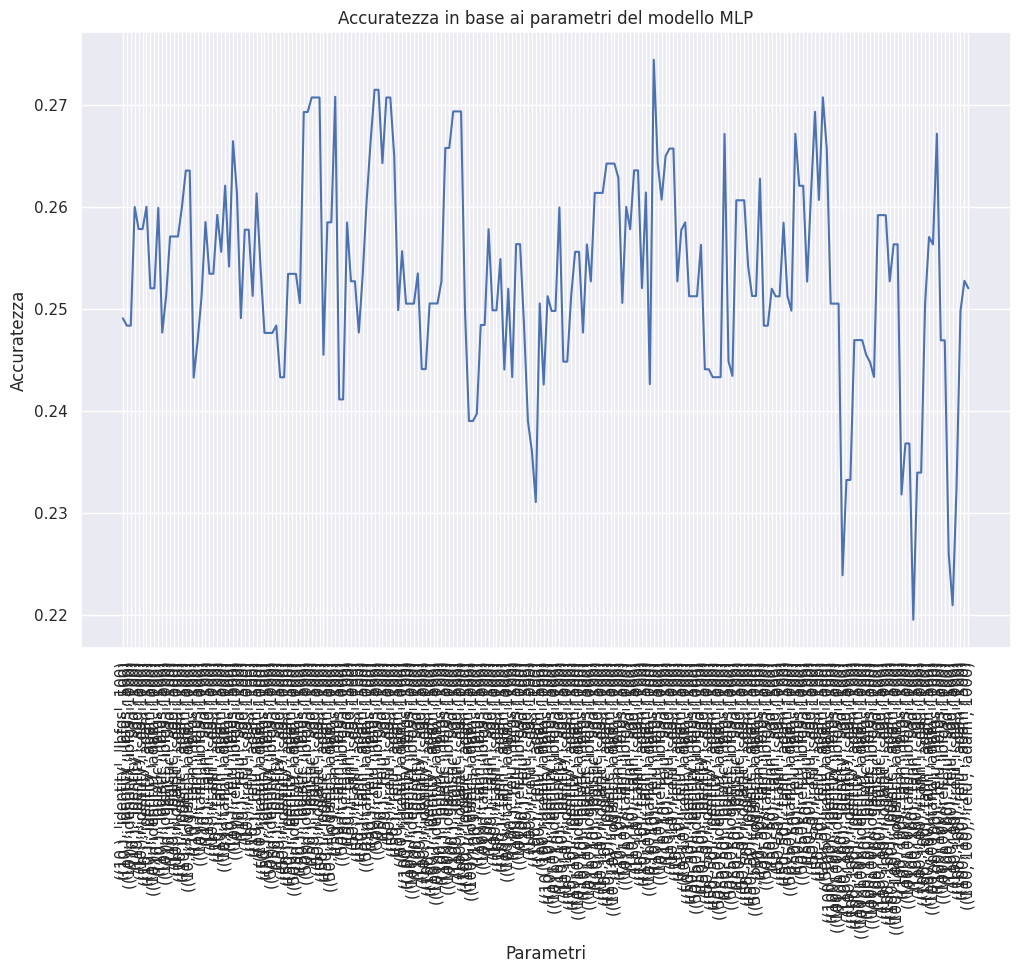

In [25]:
test_mlp_params(X, y, hidden_layer_sizes, activations, solvers, max_iters)

### Risultati e conclusioni
Nonostante le ottimizzazioni fatte non siano state delle più scrupolose e non abbiano testato in maniera esaustiva lo spazio dei parametri che in particolare per questi due modelli risulta essere eccessivamente ampio , ci accorgiamo che anche le ottimizzazioni fatte sulla rete neurale non ci permettono di ottenere risultati soddisfacenti al punto da riuscire a mettere tale modello al servizio del sistema sanitario.